---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# **Detecção de Fraudes em Cartões de Crédito**

Neste projeto, iremos abordar o **problema das fraudes em cartões de crédito**, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://c.pxhere.com/images/66/ab/1a22a11f23f4a32d21b10fcd0164-1449185.jpg!d" width="60%"></p>

A detecção de fraudes em cartões de crédito é um problema crescente em todo o mundo. Com o aumento da utilização de cartões de crédito e débito, também aumentou o número de fraudes relacionadas a esses meios de pagamento. 

Isso pode causar sérios problemas para os consumidores, já que muitas vezes eles são os responsáveis pelo pagamento de qualquer valor fraudulento. A

lém disso, as fraudes em cartões de crédito também **podem afetar negativamente as instituições financeiras**, que podem sofrer perdas significativas devido a essas atividades ilegais. 

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de **detecção de fraudes por meio de Inteligência Artificial** vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. 

E esse é o **desafio**, aprimorar cada vez mais o uso de algoritmos visando **inibir ou evitar transações fraudulentas**.

## **Importando os Dados**

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas **492 fraudes** em meio a quase **290 mil transações**.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://c.pxhere.com/photos/f7/8a/bank_banking_blue_business_businessman_buy_card_cash-912978.jpg!d" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como **Análise de Componentes Principais (*Principal Component Analysis* - PCA).**

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [1]:
#pip install scikit-plot

In [2]:
# importar os pacotes necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Importando os pacotes auxiliares de Machine Learning para tratamento dos dados
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Importando os pacotes de modelos de Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import scikitplot as skplt

# Importando os pacotes de avaliação dos modelos
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, recall_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [3]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

# estrutura do conjunto original
print("Estrutura do Conjunto Original: ", df.shape)

# criando o conjunto de teste
test = df.sample(frac=0.15, random_state=0)

# drop das linhas de teste
df = df.drop(test.index)

# verificando o conjunto
print("Estrutura do Conjunto de Teste: ", test.shape)
print("Estrutura do Conjunto de Treino: ", df.shape)

Estrutura do Conjunto Original:  (284807, 31)
Estrutura do Conjunto de Teste:  (42721, 31)
Estrutura do Conjunto de Treino:  (242086, 31)


Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

Feito isso, vamos à Análise Exploratória.

## **Análise Exploratória**

A análise exploratória de dados é importante para entender o conjunto de dados e identificar padrões ou anormalidades que podem ser sinais de atividades fraudulentas. Ela também ajuda a planejar os próximos passos e a criar um modelo de detecção de fraudes mais eficiente.

Nesta etapa abordaremos os tópicos/informações como:


### **Ver as 5 primeiras entradas**

Exibindo as 5 primeras entradas do Dataset podemos verificar que realmente as colunas foram anonimizadas através do PCA para preservar as informações iniciais. 

Os únicos dados que estão de forma ‘original’ é a coluna Time (Tempo entre a primeira transação do dateset e próxima), Amout (Valor da transação) e Class (Flag para definir o que é fraude)

In [4]:
# verificando as 5 primeiras entradas do nosso dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### **Ver o resumo estatístico do dataframe**

Aqui, vamos analisar os dados através de algumas medidas da estatística descritiva.

Observe as medidas básicas de cada variável, como média, desvio padrão, os maiores e menores valores. Isso nos dá uma noção inicial de como são os dados.

In [5]:
# ver o resumo estatístico
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,...,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000
mean,94857.597379,0.001456,-0.000800,-0.001004,0.000647,-0.000986,-0.001196,-0.000033,-0.000416,-0.000725,...,-0.000015,0.000606,-0.000482,0.000199,0.000048,-0.000269,-0.000727,0.000065,88.612429,0.001727
std,47490.660832,1.956513,1.654883,1.514580,1.417228,1.366284,1.326879,1.223095,1.199718,1.099350,...,0.734189,0.726284,0.629651,0.605150,0.521574,0.482084,0.401490,0.327734,247.655020,0.041517
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.822684,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54234.000000,-0.920406,-0.598659,-0.893374,-0.848236,-0.693615,-0.769025,-0.553805,-0.208857,-0.645058,...,-0.228492,-0.542962,-0.161941,-0.354494,-0.316853,-0.327387,-0.070744,-0.052903,5.662500,0.000000
50%,84747.000000,0.019230,0.064567,0.177607,-0.018959,-0.054544,-0.274310,0.040344,0.022160,-0.051370,...,-0.028987,0.007162,-0.011175,0.040764,0.017175,-0.052337,0.001131,0.011209,22.000000,0.000000
75%,139362.000000,1.316034,0.803174,1.026561,0.743691,0.611455,0.397688,0.570104,0.327186,0.597195,...,0.187064,0.529814,0.147358,0.439320,0.350795,0.241214,0.090776,0.078234,77.580000,0.000000
max,172792.000000,2.451888,22.057729,9.382558,16.875344,34.801666,23.917837,44.054461,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


### **Verificar se há valores ausentes**
Não foram encontrados valores ausentes ou que necessitassem ser limpos no dataset em questão. Isso pode ser verificado na função a seguir, onde o maior valor de valores nulos por coluna é zero, o que indica a ausência de valores faltantes.

In [6]:
# Buscando valores nulos
df.isnull().sum().max()

0

### **Plotar um gráfico de barras (ou countplot) para ver o balanceamento do dataset**
os dados do dataset estão bastante desbalanceados, e com o gráfico abaixo vamos perceber isso nitidamente. Essa discrepância nos dados atrapalhará o modelo e precisará ser tratada.

---Contagem dos valores da variável Class.---

0 = Transações autênticas  1 = Transações fraudulentas

0    241668
1       418
Name: Class, dtype: int64

Transações fraudulentas representam apenas 0.173% dos dados
.


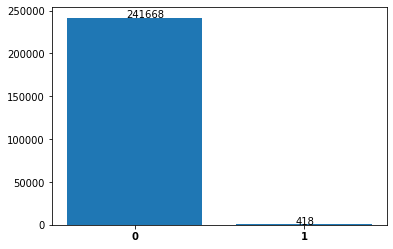

In [7]:
# Exibindo as informações estatísiticas
print("---Contagem dos valores da variável Class.---\n")
print("0 = Transações autênticas  1 = Transações fraudulentas\n")
print(df.Class.value_counts())
print("\nTransações fraudulentas representam apenas {:.3%}".format(((df.Class ==1 ).sum()) / (df.shape[0])), "dos dados\n.")

# Plotando o gráfico do balanceamento do dataset

# criando axis
altura = df.groupby('Class')['Class'].count().values
barras = df.groupby('Class')['Class'].count().index
y_pos = np.arange(len(barras))

# criando as barras
plt.bar(y_pos, altura)

# criando os textos
for i in range(0, len(y_pos)):
  plt.text(x = i - 0.05 , y = altura[i] , s = altura[i] , size = 10)

# criando nomes nos x-axis
plt.xticks(y_pos, barras, fontweight='bold', fontsize='10')

# plotar grafico
plt.show()


### **Plotar um histograma para variável `Time`**
Plotamos também dois gráficos a fim de comparar as distribuições das 2 classes ao longo da dimensão tempo (Time). No entanto, não foi identificada nenhum informação a partir das distribuições de frequência abaixo.

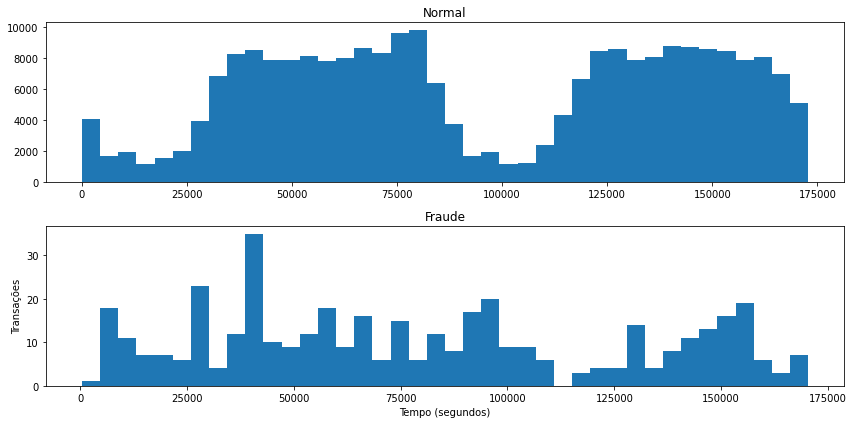

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

num_bins = 40

ax[0].hist(df.Time[df.Class == 0], bins=num_bins)
ax[0].set_title('Normal')

ax[1].hist(df.Time[df.Class == 1], bins=num_bins)
ax[1].set_title('Fraude')

plt.xlabel('Tempo (segundos)')
plt.ylabel('Transações')
plt.tight_layout()

### **Plotar um `boxplot` para a variável `Amount` e `Time`**

Vejamos agora se encontramos outliers nos dados. Para isso verificaremos apenas as variáveis que conhecemos: `Time` e `Amount`, ambas em relação à nossa variável alvo `Class`.

Vamos perceber que a variável `Amount` possui uma grande quantidade de outliers, situação muito diferente da variável `Time`, que não possui nenhum.

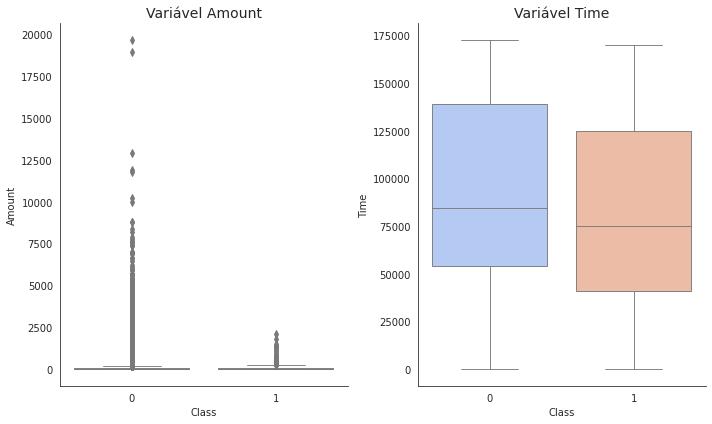

In [9]:
# Alterando o estilo do seaborn
sns.set_style("white")

# Criando a figura
fig, ax = plt.subplots(figsize=(10,6), ncols=2)
sns.despine(top=True, right=True)

# Plotando a variável Amount
sns.boxplot(x=df.Class, y=df.Amount, ax=ax[0], linewidth=.9, palette="coolwarm")
ax[0].set_title("Variável Amount", size='14')

# Plotando a variável Time
sns.boxplot(x=df.Class, y=df.Time,ax=ax[1], linewidth=.9, palette="coolwarm")
ax[1].set_title("Variável Time", size='14')

# Exibindo
plt.tight_layout()

### **Plotar uma matriz de correlação**

A matriz de correlação não nos dá quase nenhuma informação, isso pode ser devido ao alto desbalanceamento presente nos dados, como vimos anteriormente.

Com isso podemos passar para a etapa de tratamento e preparação dos dados para serem utilizados em nosso modelo de classificação.

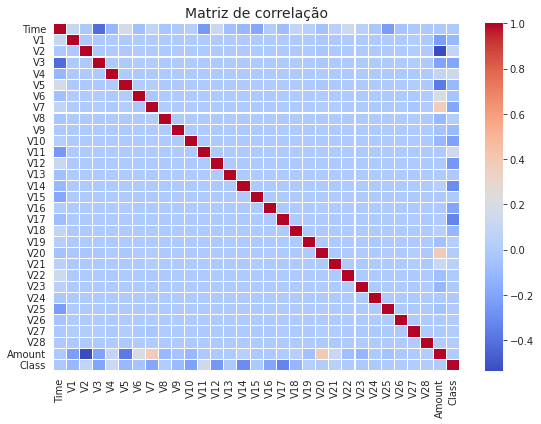

In [10]:
# Plotando a matriz de correlação
fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(df.corr(), linewidth=.05, cmap="coolwarm", ax=ax)
ax.set_title("Matriz de correlação", size=14)

plt.tight_layout()

Em resumo, as principais observações obtidas na análise exploratória foram:

1. O dataset é muito desbalanceado, já que as transações fraudulentas representam apenas 0,17% das entradas totais.
2. Não há valores ausentes ou nulos no conjunto de dados.
3. As features originais foram padronizadas, o que é importante de se considerar pois foi aplicado o metodo PCA.
4. As colunas `Time` e `Amount` não estão normalizadas.

## **Preparação dos Dados**

Nessa etapa iremos tratar os problemas que encontramos na etapa de análise de modo a preparar os dados da melhor maneira para serem utilizados pelo algoritmo de machine learning e alcançarmos um bom desempenho na previsão das transações. Para isso, precisaremos:

* Normalizar os dados que ainda não haviam sido pré-processados (Time e Amount);
* Buscar e tratar os outliers;
* Dividir o conjunto de dados entre treino e teste para serem utilizados no modelo.
* Balancear o conjunto de dados;
* Avaliar a qualidade dos dados após os tratamentos realizados;

### **Normalizando as variáveis Time e Amount**

In [11]:
# Copiando o dataframe para um novo
df_norm = df.copy()

# Instanciando o StandardScaler
std_scaler = StandardScaler()

# Normalizando
df_norm["TimeNorm"] = std_scaler.fit_transform(df.Time.values.reshape(-1,1))
df_norm["AmountNorm"] = std_scaler.fit_transform(df.Amount.values.reshape(-1,1))

# Excluir as variáveis não normalizadas do DataFrame
df_norm.drop(["Time", "Amount"], axis=1, inplace=True)

# Exibindo o DataFrame com as variáveis normalizadas
df_norm.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,TimeNorm,AmountNorm
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.997399,0.246341
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.997399,-0.346945
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.997378,1.171178
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.997378,0.140872
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.997357,-0.075195


O código acima aplica a normalização às variáveis `Time` e `Amount` e armazena os valores normalizados em duas novas variáveis chamadas `TimeNorm` e `AmountNorm`. Isso evita que o algoritmo atribua pesos incorretos às colunas devido a diferenças de escala, pois a normalização coloca os valores dessas colunas em uma escala comum com o restante dos dados, sem perder as informações presentes.

### **Análise e tratamento de *outliers***

Passaremos agora para a análise e tratamento dos outliers. Trataremos apenas a variável `Amount`, que agora é `AmountNorm`, já que não identificamos outliers na variável `Time`. Para a limpeza utilizaremos a regra do [IQR Score.](https://estatsite.com.br/2018/12/01/localizando-outliers-atraves-do-intervalo-interquartil-boxplot-codigo-sas)

In [12]:
# Calculando o Q1 e o Q3
q1 = df_norm.AmountNorm.quantile(.25)
q3 = df_norm.AmountNorm.quantile(.75)

# Calculando o IQR
IQR = q3 - q1

# Definindo os limites superior e inferior
sup = q3 + 1.5 * IQR
inf = q1 - 1.5 * IQR

# Limpando os outliers
df_clean = df_norm.copy()
df_clean.drop(df_clean[df_clean.AmountNorm > sup].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.AmountNorm < inf].index, axis=0, inplace=True)

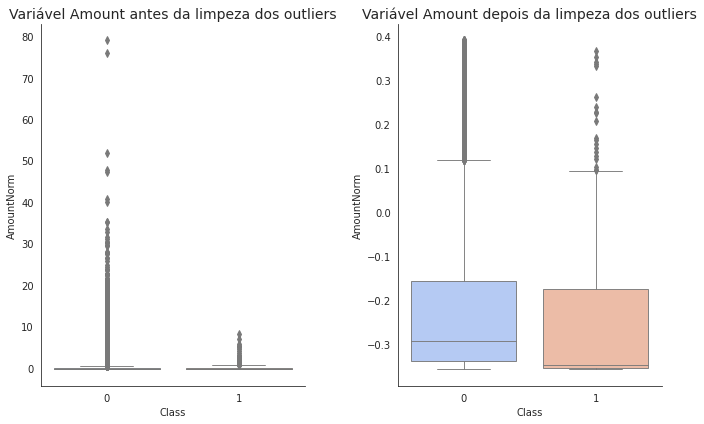

In [13]:
# Criando a figura
fig, ax = plt.subplots(figsize=(10,6), ncols=2)
sns.despine(top=True, right=True)

# Plotando a variável Amount antes da limpeza dos outliers
sns.boxplot(x=df_norm.Class, y=df_norm.AmountNorm, ax=ax[0], linewidth=.9, palette="coolwarm")
ax[0].set_title("Variável Amount antes da limpeza dos outliers", size='14')

# Plotando a variável Amount depois da limpeza dos outliers
sns.boxplot(x=df_clean.Class, y=df_clean.AmountNorm, ax=ax[1], linewidth=.9, palette="coolwarm")
ax[1].set_title("Variável Amount depois da limpeza dos outliers", size='14')

# Exibindo
plt.tight_layout()

Após a aplicação da técnica **IQR Score** para remover os outliers, é possível observar uma melhoria na qualidade dos dados. Isso fica evidente ao comparar o *boxplot* antes e depois da limpeza: os quartis e os limites superior e inferior tornam-se mais visíveis após a limpeza, enquanto as informações estatísticas apresentam um comportamento mais uniforme, um desvio padrão menor e valores de média e mediana mais próximos.


### **Dividir entre conjuntos de Treino e Validação**

Agora, dividiremos os dados entre conjuntos de treino e teste. Essa etapa é fundamental na criação de modelos de aprendizado de máquina, pois nos permite treinar o modelo com parte dos dados e avaliar seu desempenho com o restante, simulando como ele se comportaria com dados completamente novos. Além disso, também é necessário separar os dados em *matriz de features* (feature matrix) e *vetor alvo* (target vector).

* **Feature matrix**: matriz com todas as variáveis que serão utilizadas pelo modelo para prever a variável alvo;
* **Target vector**: vetor alvo (ou variável alvo), é a variável que desejamos que seja prevista corretamente pelo modelo.

In [14]:
# Separando os dados entre feature matrix e target vector
X = df_clean.drop("Class", axis=1)
y = df_clean.Class

# Separar os dados entre treino e teste
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, stratify=y)

### **Balanceamento dos dados**

Agora, aplicaremos a técnica de undersampling para balancear os dados. Essa técnica consiste em diminuir o número de observações da classe com maior quantidade, de modo a igualá-las. O *medium* do [Data Hackers](https://medium.com/data-hackers/como-lidar-com-dados-desbalanceados-em-problemas-de-classifica%C3%A7%C3%A3o-17c4d4357ef9) apresenta um ótimo artigo que explica diversas formas de balanceamento de dados, incluindo o undersampling, vale a pena dar uma olhada.

---Contagem dos valores da variável Class após o balanceamento.---

0 = Transações autênticas  1 = Transações fraudulentas

0    253
1    253
Name: Class, dtype: int64


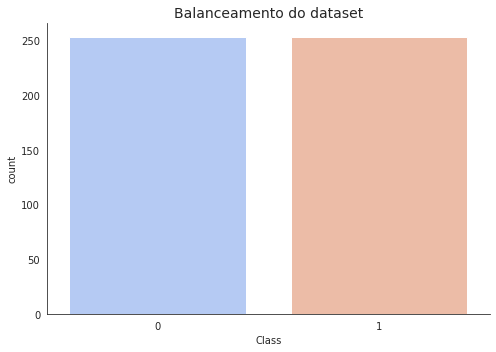

In [15]:
# Instanciando o RandomUnderSampler
rus = RandomUnderSampler()

#Balanceando X_train e y_train
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Exibindo as informações estatísiticas após o balanceamento
print("---Contagem dos valores da variável Class após o balanceamento.---\n")
print("0 = Transações autênticas  1 = Transações fraudulentas\n")
print(y_train_rus.value_counts())

# Plotando o gráfico do balanceamento do dataset após o balanceamento
fig, ax = plt.subplots(figsize=(7,5))
sns.despine(top=True, right=True)
sns.countplot(x=y_train_rus, palette="coolwarm", ax=ax)
ax.set_title("Balanceamento do dataset", size=14)
plt.tight_layout()

Uma vez que o dataset continha poucas observações para a classificação Class == 1, a técnica de *undersampling* foi utilizada para reduzir o número de observações da classificação majoritária Class == 0 e, dessa forma, balancear os dados.

Agora que os dados foram tratados, normalizados, limpos de outliers e balanceados, poderemos avançar para a etapa de criação do modelo de aprendizado de máquina. O objetivo é construir um modelo capaz de **detectar transações fraudulentas em cartões de crédito.**

## **Modelo de Machine Learning**

Neste problema, precisamos prever se uma transação é fraudulenta ou autêntica. 

Para isso, nossa variável alvo pode assumir dois valores distintos: 0 para transações autênticas e 1 para transações fraudulentas. Isso significa que a variável alvo é discreta, ou seja, pode assumir apenas valores discretos (0 ou 1), mas não pode assumir valores intermediários ou contínuos (como 0,01, 0,001, etc.). 

Portanto, utilizaremos modelos de classificação para resolver esse problema. Neste estudo, aplicaremos dois modelos de classificação: Regressão Logística (**Logistic Regression**), Árvore de Decisão (**Decision Tree**) e Floresta Aleatória (**Random Forest**), e compararemos qual deles teve o melhor desempenho.

### **Criando o modelo de Regressão Logistica**

In [16]:
# Instanciando o modelo
np.random.seed(2)
logistic_model = LogisticRegression(C=0.01)

# Fit do modelo de Regressão
logistic_model.fit(X_train_rus, y_train_rus)

# Testando o modelo com os dados de teste
logistic_y_pred = logistic_model.predict(X_val)

### **Criando o modelo de Árvore de Decisão**

In [17]:
# Instanciando o modelo
np.random.seed(2)
tree_model = DecisionTreeClassifier(criterion="entropy",max_depth=6)

# Fit do modelo de Árvore de Decisão
tree_model.fit(X_train_rus, y_train_rus)

# Testando o modelo com os dados de teste
tree_y_pred = tree_model.predict(X_val)

### **Criando o modelo de Floresta Aleatória**

In [18]:
# Instanciando o modelo
np.random.seed(2)
forest_model = RandomForestClassifier(criterion="gini",max_depth=6)

# Fit do modelo de Floresta Aleatória
forest_model.fit(X_train_rus, y_train_rus)

# Testando o modelo com os dados de teste
forest_y_pred = forest_model.predict(X_val)

## **Avaliar o desempenho do modelo**

Existem diversas métricas e ferramentas que auxiliam na avaliação de um modelo de Machine Learning. Aqui, usaremos como ferramentas a *Confusion Matrix* e o *Classification Report* e como métricas utilizaremos principalmente a *Acurácia*, a *AUC* e o *Recall*.

De maneira resumida, o funcionamento dessas ferramentas e métricas é o seguinte:

* **Confusion Matrix:** plota uma matriz que possui, eu sei eixo Y, os valores verdadeiros (originais) dos dados de teste e no eixo X os valores previstos pelo algoritmo para cada classificação possível da variável alvo;
* **Classification Report:** relatório com as principais métricas utilizadas divididas para cada classificação possível da variável alvo;
* **Acurácia:** fração de predições corretas (no total). Pode ser resumida em "Quanto o modelo está acertando?". É preciso tomar cuidado com essa métrica, pois pode nos dar uma falsa sensação de bom desempenho, pois um modelo pode ter uma acurácia de 99% e acertar apenas 60% uma classificação específica (mais sobre aqui);
* **AUC:** fornece uma medida agregada de desempenho em todos os limites de classificação possíveis. Uma maneira de interpretar AUC é como a probabilidade de que o modelo classifique um exemplo positivo aleatório mais alto do que um exemplo negativo aleatório. Quanto mais próximo de 1, melhor. Um modelo cujas previsões estão 100% erradas tem uma AUC de 0,0; aquele cujas previsões são 100% corretas tem uma AUC de 1,0 (mais sobre aqui);
* **Recall:** qual a porcentagem de classificações positivas (em nosso exemplo: 1 - Fraudulentas) o modelo consegue prever. Pode ser resumida em: "Dentre os positivos reais, qual a proporção de acerto?".

---------------AVALIANDO O MODELO DE REGRESSÃO LOGÍSTICA---------------

Relatório de Classificação

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     53672
           1       0.14      0.94      0.24        84

    accuracy                           0.99     53756
   macro avg       0.57      0.97      0.62     53756
weighted avg       1.00      0.99      0.99     53756


--Métricas do modelo--

Acurácia: 99.06%
AUC: 0.97
Recall: 94.05%

Matriz de Confusão



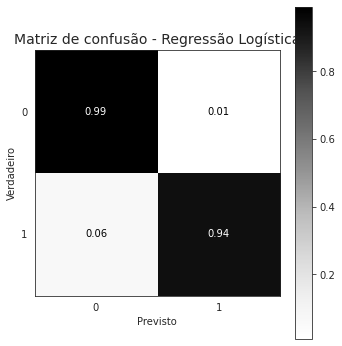

In [19]:
print("---------------AVALIANDO O MODELO DE REGRESSÃO LOGÍSTICA---------------")
print("\nRelatório de Classificação\n")
# Imprimindo o classification report
print(classification_report(y_val, logistic_y_pred))

print("\n--Métricas do modelo--\n")
# Imprimindo as métricas
print("Acurácia: {:.2%}".format(accuracy_score(y_val, logistic_y_pred)))
print("AUC: {:.2f}".format(roc_auc_score(y_val, logistic_y_pred)))
print("Recall: {:.2%}".format(recall_score(y_val, logistic_y_pred)))

print("\nMatriz de Confusão\n")
# Criando a figura
fig, ax = plt.subplots(figsize=(5,5))

# Plotando a matriz
skplt.metrics.plot_confusion_matrix(y_val, logistic_y_pred, ax=ax, normalize=True, cmap="Greys")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")
ax.set_title("Matriz de confusão - Regressão Logística", size="14")

# Exibindo
plt.tight_layout()

---------------AVALIANDO O MODELO DE ÁRVORE DE DECISÃO---------------

Relatório de Classificação

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     53672
           1       0.02      0.93      0.04        84

    accuracy                           0.93     53756
   macro avg       0.51      0.93      0.50     53756
weighted avg       1.00      0.93      0.96     53756


--Métricas do modelo--

Acurácia: 92.75%
AUC: 0.93
Recall: 92.86%

Matriz de Confusão



<Figure size 432x288 with 0 Axes>

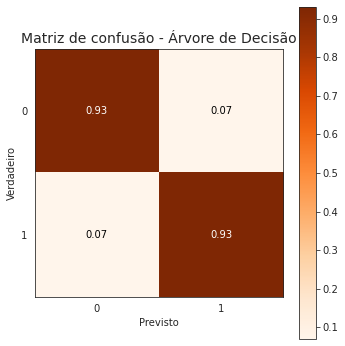

In [20]:
print("---------------AVALIANDO O MODELO DE ÁRVORE DE DECISÃO---------------")
print("\nRelatório de Classificação\n")
# Imprimindo o classification report
print(classification_report(y_val, tree_y_pred))

print("\n--Métricas do modelo--\n")
# Imprimindo as métricas
print("Acurácia: {:.2%}".format(accuracy_score(y_val, tree_y_pred)))
print("AUC: {:.2f}".format(roc_auc_score(y_val, tree_y_pred)))
print("Recall: {:.2%}".format(recall_score(y_val, tree_y_pred)))
plt.tight_layout()

print("\nMatriz de Confusão\n")
# Criando a figura
fig, ax = plt.subplots(figsize=(5,5))

# Plotando a matriz
skplt.metrics.plot_confusion_matrix(y_val, tree_y_pred, ax=ax, normalize=True, cmap="Oranges")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")
ax.set_title("Matriz de confusão - Árvore de Decisão", size="14")

# Exibindo
plt.tight_layout()

---------------AVALIANDO O MODELO DE FLORESTA ALEATÓRIA---------------

Relatório de Classificação

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     53672
           1       0.10      0.95      0.18        84

    accuracy                           0.99     53756
   macro avg       0.55      0.97      0.58     53756
weighted avg       1.00      0.99      0.99     53756


--Métricas do modelo--

Acurácia: 98.61%
AUC: 0.97
Recall: 95.24%

Matriz de Confusão



<Figure size 432x288 with 0 Axes>

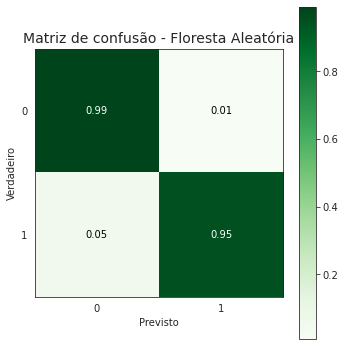

In [21]:
print("---------------AVALIANDO O MODELO DE FLORESTA ALEATÓRIA---------------")
print("\nRelatório de Classificação\n")
# Imprimindo o classification report
print(classification_report(y_val, forest_y_pred))

print("\n--Métricas do modelo--\n")
# Imprimindo as métricas
print("Acurácia: {:.2%}".format(accuracy_score(y_val, forest_y_pred)))
print("AUC: {:.2f}".format(roc_auc_score(y_val, forest_y_pred)))
print("Recall: {:.2%}".format(recall_score(y_val, forest_y_pred)))
plt.tight_layout()

print("\nMatriz de Confusão\n")
# Criando a figura
fig, ax = plt.subplots(figsize=(5,5))

# Plotando a matriz
skplt.metrics.plot_confusion_matrix(y_val, forest_y_pred, ax=ax, normalize=True, cmap="Greens")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")
ax.set_title("Matriz de confusão - Floresta Aleatória", size="14")

# Exibindo
plt.tight_layout()

Ao avaliarmos os modelos, percebemos que o modelo de Floresta Aleatória tem o melhor desempenho nos dados utilizados para a previsão das fraudes. Nas simulações feitas durante este estudo, o modelo conseguiu prever cerca de 95% das transações fraudulentas contra 94% de acerto no modelo de Regressão Logística e contra 93% de acerto no modelo de Árvore de Decisão.

## **Fazendo Previsões no Conjunto de Teste**

No início do projeto, dividimos os dados em três conjuntos: um para treinamento, um para validação e um para teste. 

Agora que já exploramos e preparamos os dados, instanciamos o modelo e fizemos previsões no conjunto de validação, é hora de avaliar o potencial desse modelo com o conjunto de teste.

Para obter resultados precisos, precisamos preparar os novos dados de teste da mesma maneira que os dados de treinamento. 

Isso inclui padronizar as colunas Time e Amount, mas não balancear os dados, pois isso resultaria em perda de informação. 

O modelo deve ser tratado de maneira a poder fazer previsões em todas as linhas que receber.


In [22]:
# padronizar as colunas Time e Amount - Teste
test_clean = test.copy()

std_scaler = StandardScaler()
test_clean['AmountNorm'] = std_scaler.fit_transform(test_clean['Amount'].values.reshape(-1, 1))
test_clean['TimeNorm'] = std_scaler.fit_transform(test_clean['Time'].values.reshape(-1, 1))

test_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
test_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,AmountNorm,TimeNorm
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,...,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0,-0.177738,0.658372
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,...,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0,-0.321945,1.320094
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,...,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0,0.034666,1.219742
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,...,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0,0.838765,-0.919236
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,...,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,0,-0.310490,-1.572827


Agora vamos dividir entre X e y, e depois fazer as previsões utilizando o método escolhido, que nesse caso foi a Floresta Aleatória (**Random Forest**)

In [23]:
# separar variáveis entre X e y
X_test = test_clean.drop('Class', axis=1)
y_test = test['Class']

In [28]:
# fazer as previsões em cima dos dados de teste
y_pred = forest_model.predict(X_test)
y_proba = forest_model.predict_proba(X_test)

Pronto! Com nossas previsões feitas, é hora de visualizar os resultados.

---------------AVALIANDO O MODELO DE FLORESTA ALEATÓRIA---------------

Relatório de Classificação

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     42647
           1       0.09      0.89      0.16        74

    accuracy                           0.98     42721
   macro avg       0.54      0.94      0.58     42721
weighted avg       1.00      0.98      0.99     42721


--Métricas do modelo--

Acurácia: 98.37%
AUC: 0.94
Recall: 89.19%

Matriz de Confusão



<Figure size 432x288 with 0 Axes>

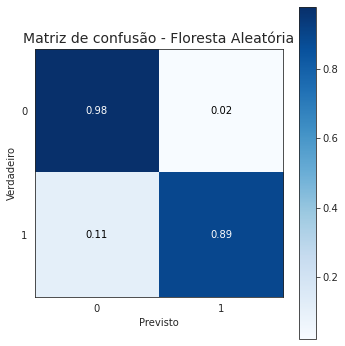

In [29]:
print("---------------AVALIANDO O MODELO DE FLORESTA ALEATÓRIA---------------")
print("\nRelatório de Classificação\n")
# Imprimindo o classification report
print(classification_report(y_test, y_pred))

print("\n--Métricas do modelo--\n")
# Imprimindo as métricas
print("Acurácia: {:.2%}".format(accuracy_score(y_test, y_pred)))
print("AUC: {:.2f}".format(roc_auc_score(y_test, y_pred)))
print("Recall: {:.2%}".format(recall_score(y_test, y_pred)))
plt.tight_layout()

print("\nMatriz de Confusão\n")
# Criando a figura
fig, ax = plt.subplots(figsize=(5,5))

# Plotando a matriz
skplt.metrics.plot_confusion_matrix(y_test, y_pred, ax=ax, normalize=True, cmap="Blues")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")
ax.set_title("Matriz de confusão - Floresta Aleatória", size="14")

# Exibindo
plt.tight_layout()

Podemos ver que nossos resultados foram um pouco inferiores ao do conjunto de validação, mas ainda considero um excelente resultado.

O que podemos fazer posteriormente é fazer testes com ajustes de hiperparametros, e verificar qual ficaria com melhor desempenho.

## **Conclusão**

Modelos de aprendizado de máquina são ferramentas valiosas para a maioria das empresas e podem ser utilizados para resolver uma variedade de tarefas diferentes. 

Aplicar um algoritmo de aprendizado de máquina para detectar transações fraudulentas em cartões de crédito pode resultar em economias significativas em um único dia. No entanto, é crucial prestar atenção aos passos de análise e tratamento dos dados antes de construir o modelo. 

Sem uma análise e tratamento adequados, o modelo terá um desempenho insatisfatório e não será capaz de cumprir sua tarefa de maneira eficiente.

Neste estudo, os modelos construídos apresentaram um ótimo desempenho após o tratamento adequado dos dados, mesmo sem realizarmos ajustes nos hiperparâmetros.